# **Predicting Breast Cancer In A Patient**

# Problem Statement:
Given the details of cell nuclei taken from breast mass, predict whether or not a patient
has breast cancer using the Ensembling Techniques. Perform necessary exploratory
data analysis before building the model and evaluate the model based on performance
metrics other than model accuracy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
breast_cancer = pd.read_csv("cancer.csv")
breast_cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
breast_cancer.shape

(569, 33)

In [ ]:
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
breast_cancer = breast_cancer.drop(columns = ['Unnamed: 32'], axis=1)

In [ ]:
breast_cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Checking whether it is balanced or imbalanced dataset


In [ ]:
breast_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
breast_cancer = breast_cancer.drop(columns = ['id'], axis=1)

Detecting outliers present in the dataset

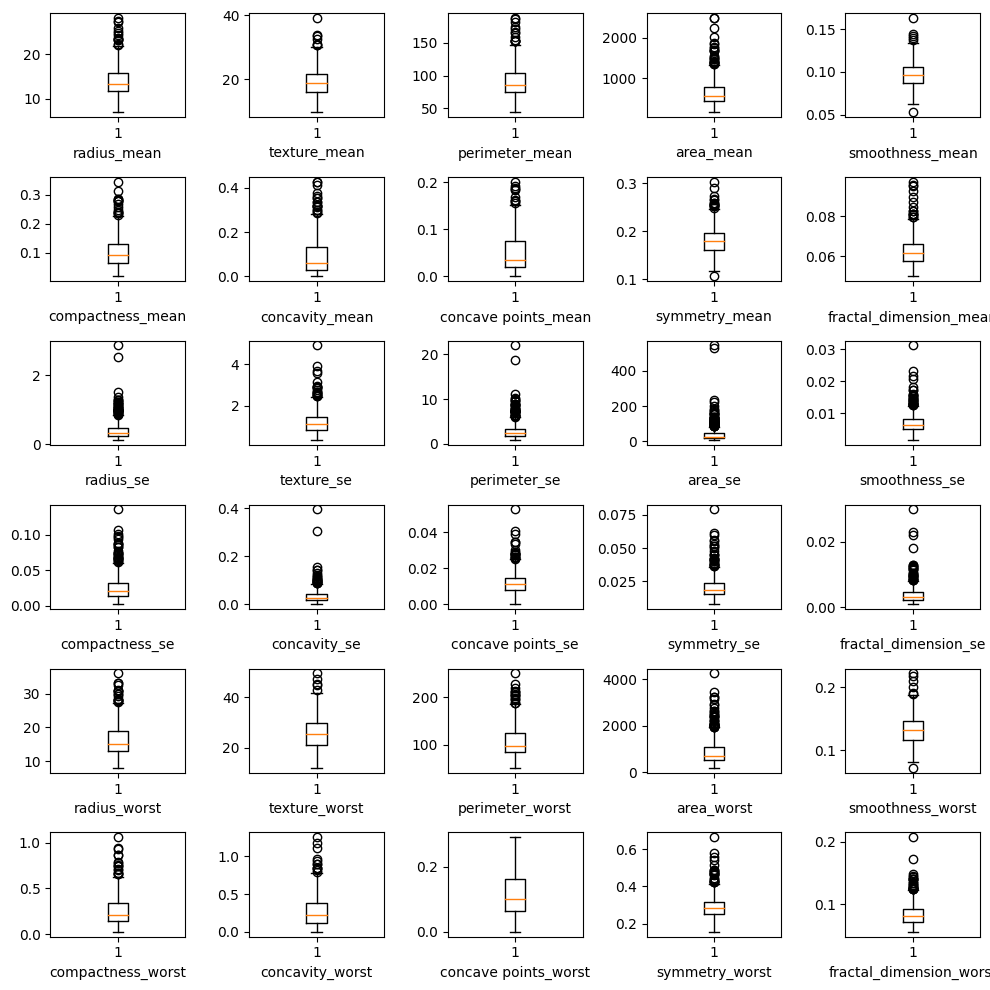

In [ ]:

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10, 10))
axes = axes.flatten()
for i, column in enumerate(breast_cancer.columns[1:], start=1):
    ax = axes[i-1]  # Subtract 1 to adjust for the ignored 0th column
    ax.boxplot(breast_cancer[column])
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

Eventhough the dataset have more outliers but still the best approach is to retain them because it is a medical dataset

Encoding

In [ ]:
breast_cancer.diagnosis = breast_cancer.diagnosis.map({'M':1, 'B':0})

In [ ]:
breast_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
X = breast_cancer.drop('diagnosis', axis = 1)
y = breast_cancer.diagnosis

Splitting


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

Scaling

In [ ]:
scaler = RobustScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

Evaluation Metrics

In [ ]:

acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auroc = roc_auc_score( y_test, predictions)
print("Random forest model accuracy score: {:.2f}".format(acc))
print("Random forest model F1-score: {:.2f}".format(f1))
print("Random forest model AUROC score: {:.2f}".format(auroc))

Random forest model accuracy score: 0.96
Random forest model F1-score: 0.94
Random forest model AUROC score: 0.96


Interpreting the model results


In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

In [ ]:
feature_col = list(breast_cancer.loc[:,breast_cancer.columns[1:]])

In [ ]:
tree = rf.estimators_[4]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_col, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


Features Importances

In [ ]:
importances = rf.feature_importances_

In [ ]:
importances

array([0.02786419, 0.01429107, 0.03850232, 0.05677139, 0.00542794,
       0.00973917, 0.08290854, 0.09389184, 0.00586691, 0.00307502,
       0.00817221, 0.00509342, 0.01671241, 0.06068886, 0.00334237,
       0.0030084 , 0.00440363, 0.00449678, 0.00616501, 0.00512177,
       0.08942931, 0.01688745, 0.12823759, 0.14501745, 0.01352527,
       0.0164839 , 0.02882773, 0.08747094, 0.01231705, 0.00626005])

In [ ]:
imp_feature = [(feature, round(importance, 2)) for feature, importance in zip(feature_col, importances)]
imp_feature = sorted(imp_feature, key = lambda x:x[1], reverse = True)
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in imp_feature];

Feature: area_worst                     Importance: 0.15
Feature: perimeter_worst                Importance: 0.13
Feature: concave points_mean            Importance: 0.09
Feature: radius_worst                   Importance: 0.09
Feature: concave points_worst           Importance: 0.09
Feature: concavity_mean                 Importance: 0.08
Feature: area_mean                      Importance: 0.06
Feature: area_se                        Importance: 0.06
Feature: perimeter_mean                 Importance: 0.04
Feature: radius_mean                    Importance: 0.03
Feature: concavity_worst                Importance: 0.03
Feature: perimeter_se                   Importance: 0.02
Feature: texture_worst                  Importance: 0.02
Feature: compactness_worst              Importance: 0.02
Feature: texture_mean                   Importance: 0.01
Feature: smoothness_mean                Importance: 0.01
Feature: compactness_mean               Importance: 0.01
Feature: symmetry_mean         

XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  print("Learning rate : ", lr, " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9483942414174973
Learning rate :  0.02  Cross-Val score :  0.9461240310077519
Learning rate :  0.03  Cross-Val score :  0.9460686600221484
Learning rate :  0.04  Cross-Val score :  0.9531007751937984
Learning rate :  0.05  Cross-Val score :  0.9531007751937984
Learning rate :  0.06  Cross-Val score :  0.9531007751937984
Learning rate :  0.07  Cross-Val score :  0.9578073089700997
Learning rate :  0.08  Cross-Val score :  0.9601328903654485
Learning rate :  0.09  Cross-Val score :  0.9648394241417497
Learning rate :  0.1  Cross-Val score :  0.9625138427464008
Learning rate :  0.11  Cross-Val score :  0.9648394241417497
Learning rate :  0.12  Cross-Val score :  0.9625138427464008
Learning rate :  0.13  Cross-Val score :  0.9671650055370986
Learning rate :  0.14  Cross-Val score :  0.969545957918051
Learning rate :  0.15  Cross-Val score :  0.9648394241417497
Learning rate :  0.2  Cross-Val score :  0.9647840531561462
Learning rate :  0.5  Cross

Cross-val score is higher for learning rate = 0.14

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.14, n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('XGBoost model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print('XGBoost model f1 score: {0:0.2f}'. format(f1_score(y_test, y_pred)))
print('XGBoost model auroc score: {0:0.2f}'. format(roc_auc_score(y_test, y_pred)))

XGBoost model accuracy score: 0.98
XGBoost model f1 score: 0.97
XGBoost model auroc score: 0.98


Result: For this particular dataset, to predict whether the patient has cancer or not both Random forest and XG boost giving ROC AUC score of more than 95%. XG boost performs better than Random forest with the ROC AUC score of 98%


